# Laden

In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random



########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [2]:
#### Timeflipped
X=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_24_PMTs_PID_120k_Files_gn_tf.pickle","rb"))
Y=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_24_PMTs_PID_120k_Files_gn_tf.pickle","rb"))

## 120k Set

In [3]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in training_data[:5]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3

Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
(85000, 3, 8, 2) (20000, 3, 8, 2) (15005, 3, 8, 2)


# Testen der besten Methode

W0528 13:23:20.423221  8780 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0528 13:23:20.833245  8780 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 8, 160)         1440      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 4, 160)         640       
_________________________________________________________________
dropout (Dropout)            (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 4, 160)         102560    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 2, 160)         6

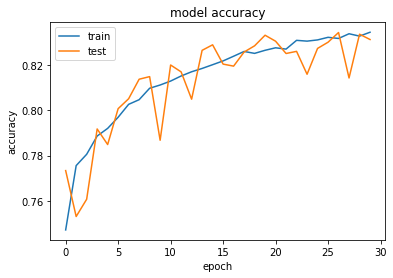

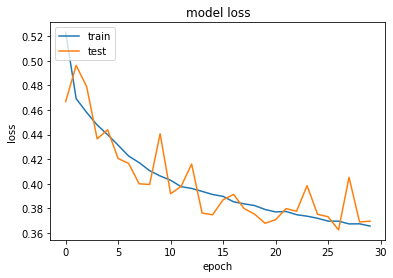

Ende des Versuchs: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 3, 8, 160)         1440      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 4, 160)         102560    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None

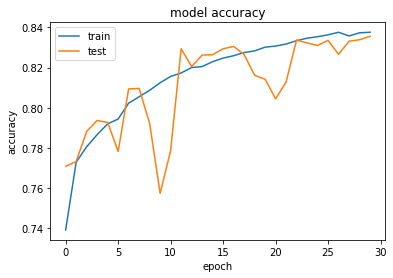

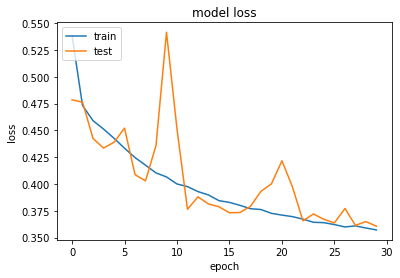

Ende des Versuchs: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 3, 8, 190)         1710      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 4, 190)         144590    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None

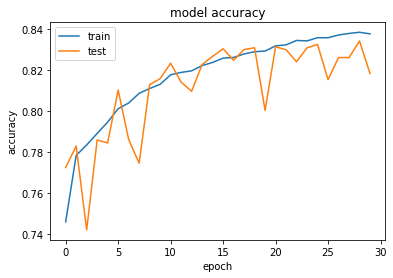

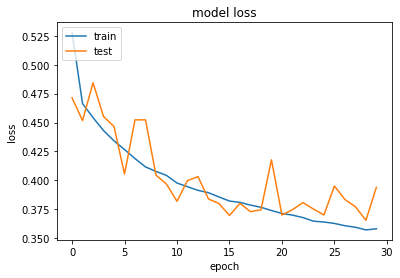

Ende des Versuchs: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 3, 8, 190)         1710      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_10 (Dropout)         (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 4, 190)         144590    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_11 (Batc (None

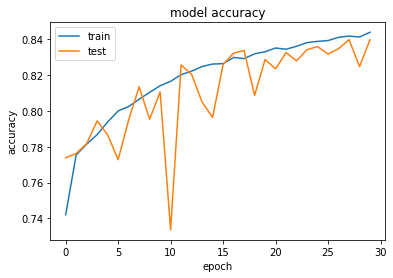

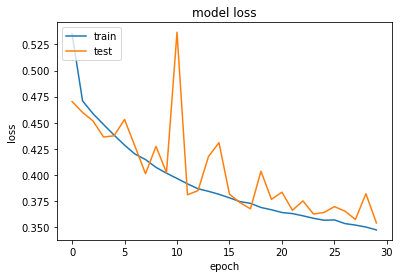

Ende des Versuchs: 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 3, 8, 240)         2160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_14 (Dropout)         (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 4, 240)         230640    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_15 (Batc (None

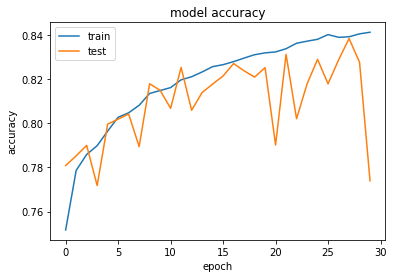

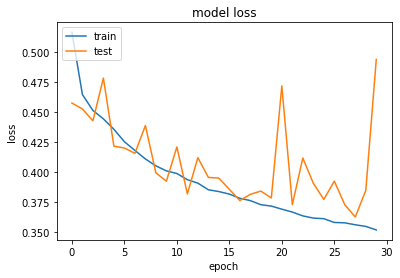

Ende des Versuchs: 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 3, 8, 240)         2160      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_17 (Dropout)         (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 4, 240)         230640    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_18 (Batc (None

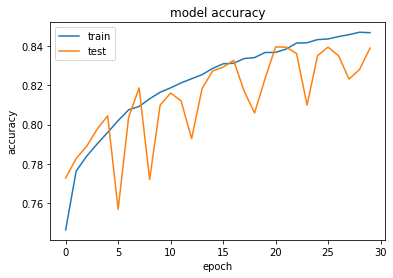

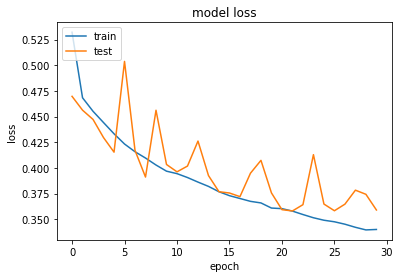

Ende des Versuchs: 
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 3, 8, 160)         1440      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_21 (Dropout)         (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 4, 160)         102560    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_22 (Batc (None

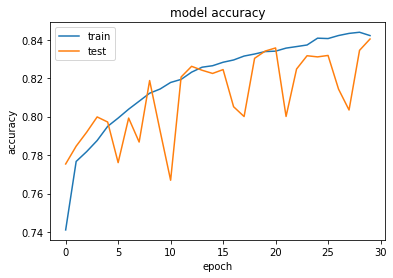

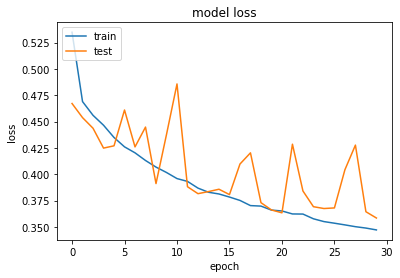

Ende des Versuchs: 
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 3, 8, 160)         1440      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_25 (Dropout)         (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 2, 4, 160)         102560    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_26 (Batc (None

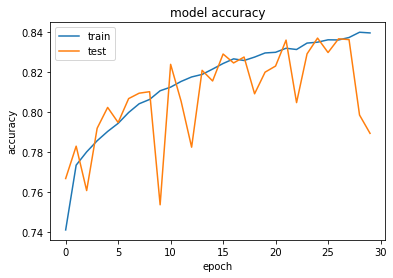

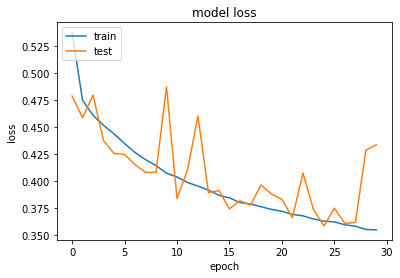

Ende des Versuchs: 
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 3, 8, 190)         1710      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_30 (Dropout)         (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 2, 4, 190)         144590    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_31 (Batc (None

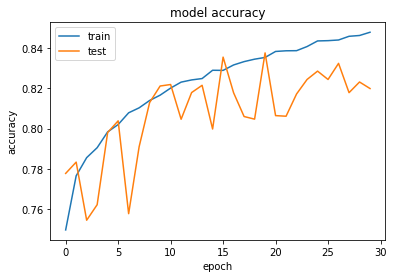

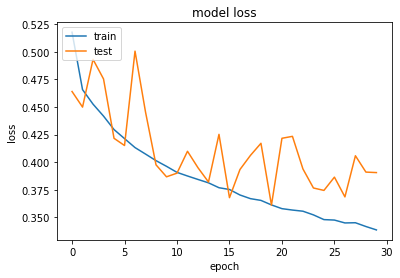

Ende des Versuchs: 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 3, 8, 190)         1710      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_34 (Dropout)         (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 2, 4, 190)         144590    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_35 (Batc (None

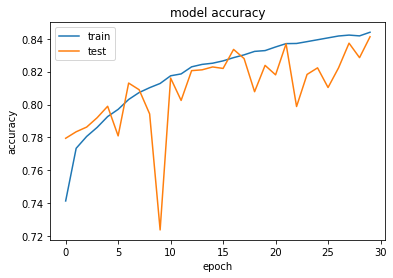

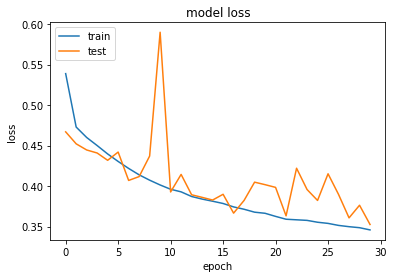

Ende des Versuchs: 
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 3, 8, 240)         2160      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_39 (Dropout)         (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 2, 4, 240)         230640    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_40 (Batc (Non

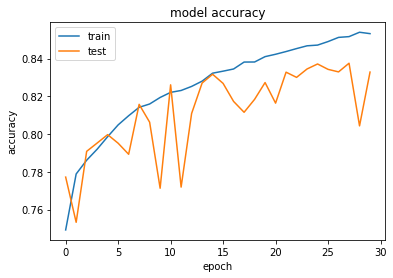

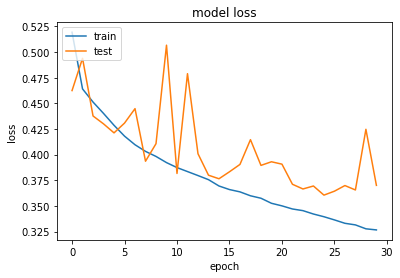

Ende des Versuchs: 
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 3, 8, 240)         2160      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_43 (Dropout)         (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 2, 4, 240)         230640    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_44 (Batc (Non

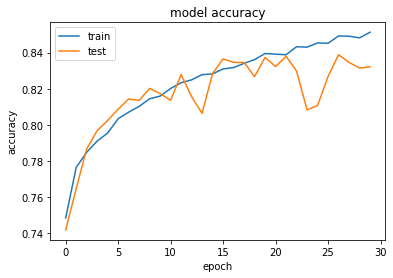

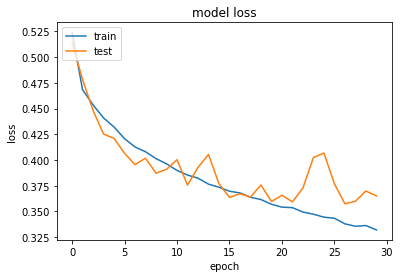

Ende des Versuchs: 
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 3, 8, 160)         3040      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_48 (Dropout)         (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 2, 4, 160)         230560    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_49 (Batc (Non

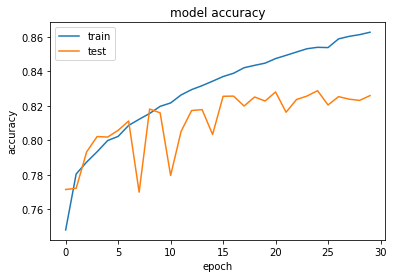

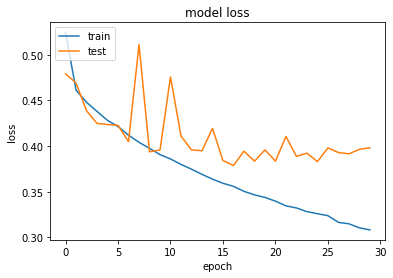

Ende des Versuchs: 
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 3, 8, 160)         3040      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_51 (Batc (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_51 (Dropout)         (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 2, 4, 160)         230560    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_52 (Batc (Non

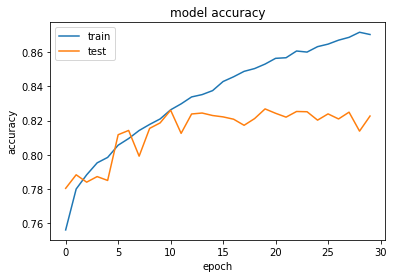

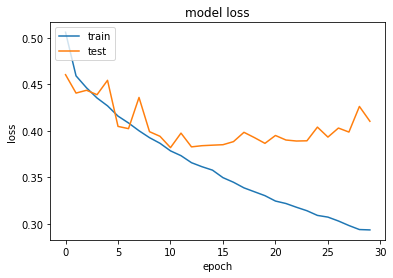

Ende des Versuchs: 
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 3, 8, 190)         3610      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_55 (Batc (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_55 (Dropout)         (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 2, 4, 190)         325090    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_56 (Batc (Non

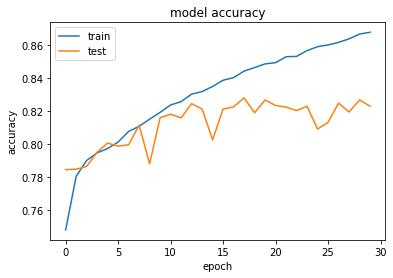

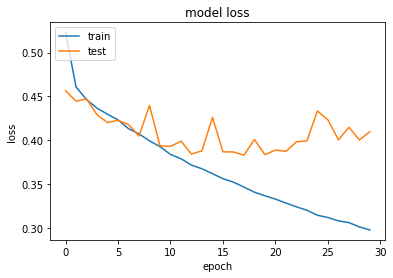

Ende des Versuchs: 
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 3, 8, 190)         3610      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_58 (Batc (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_58 (Dropout)         (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 2, 4, 190)         325090    
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_59 (Batc (Non

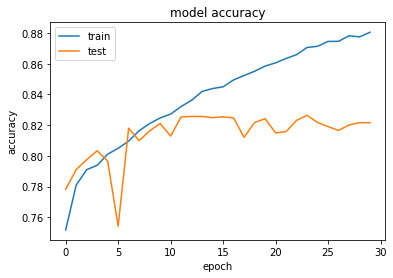

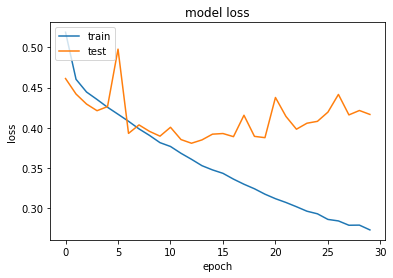

Ende des Versuchs: 
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 3, 8, 240)         4560      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_62 (Batc (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_62 (Dropout)         (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 2, 4, 240)         518640    
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_63 (Batc (Non

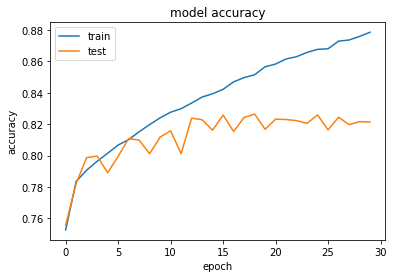

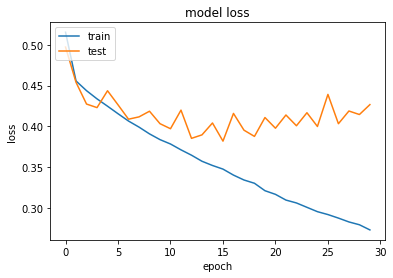

Ende des Versuchs: 
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 3, 8, 240)         4560      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_65 (Batc (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_65 (Dropout)         (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 2, 4, 240)         518640    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_66 (Batc (Non

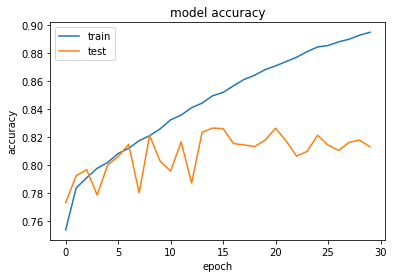

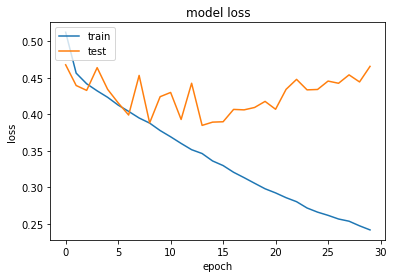

Ende des Versuchs: 
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 3, 8, 160)         3040      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_69 (Batc (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_69 (Dropout)         (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 2, 4, 160)         230560    
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_70 (Batc (Non

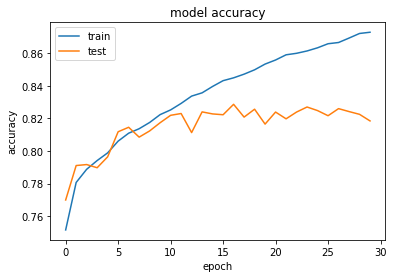

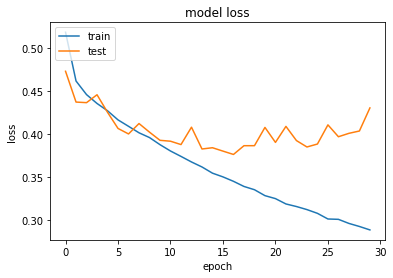

Ende des Versuchs: 
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 3, 8, 160)         3040      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_73 (Batc (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_73 (Dropout)         (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 2, 4, 160)         230560    
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_74 (Batc (Non

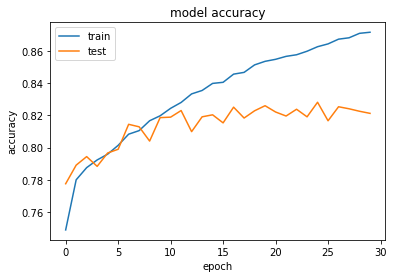

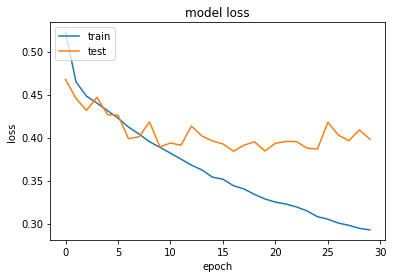

Ende des Versuchs: 
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 3, 8, 190)         3610      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_78 (Batc (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_78 (Dropout)         (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 2, 4, 190)         325090    
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_79 (Batc (Non

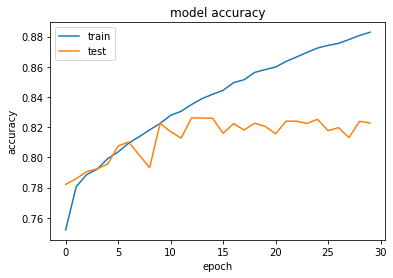

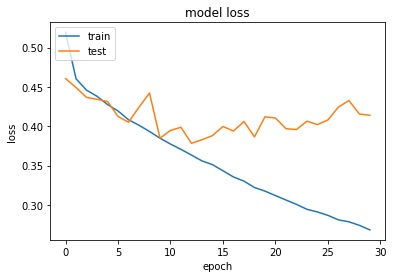

Ende des Versuchs: 
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 3, 8, 190)         3610      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_82 (Batc (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_82 (Dropout)         (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 2, 4, 190)         325090    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_83 (Batc (Non

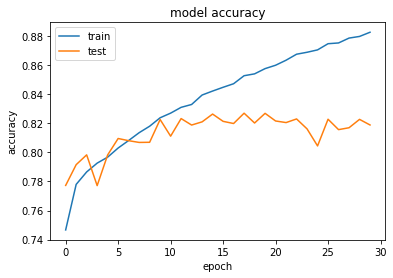

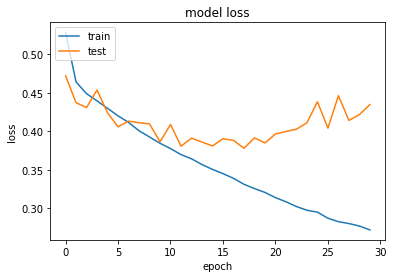

Ende des Versuchs: 
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 3, 8, 240)         4560      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_87 (Batc (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_87 (Dropout)         (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 2, 4, 240)         518640    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_88 (Batc (Non

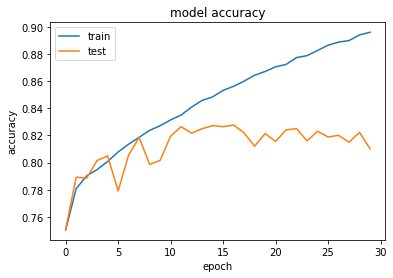

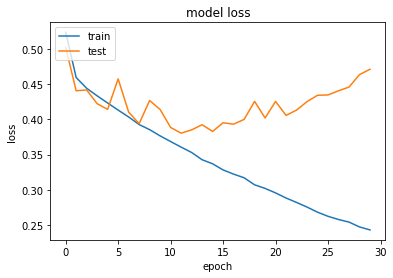

Ende des Versuchs: 
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 3, 8, 240)         4560      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_91 (Batc (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_91 (Dropout)         (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 2, 4, 240)         518640    
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_92 (Batc (Non

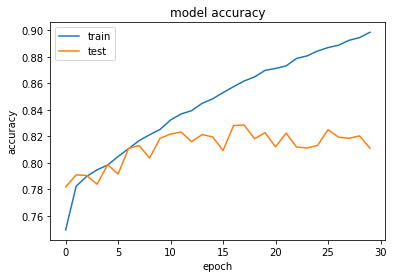

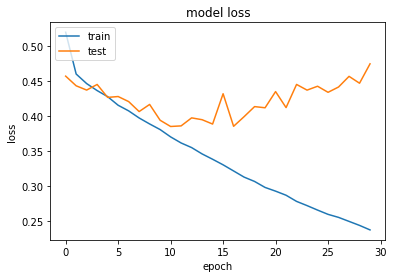

Ende des Versuchs: 
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 3, 8, 160)         5280      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_96 (Batc (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_96 (Dropout)         (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 2, 4, 160)         409760    
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_97 (Batc (Non

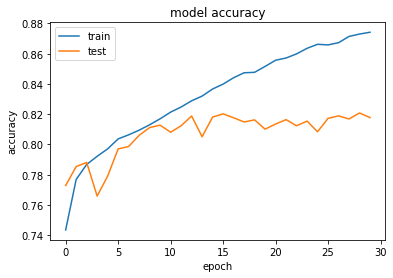

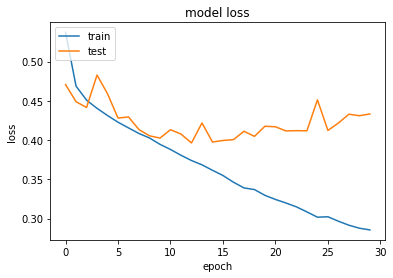

Ende des Versuchs: 
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 3, 8, 160)         5280      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_99 (Batc (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_99 (Dropout)         (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 2, 4, 160)         409760    
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_100 (Bat (Non

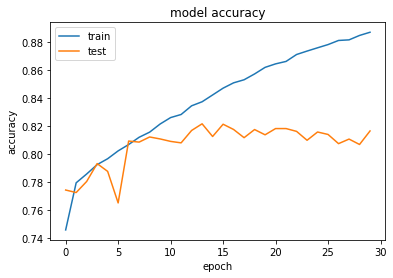

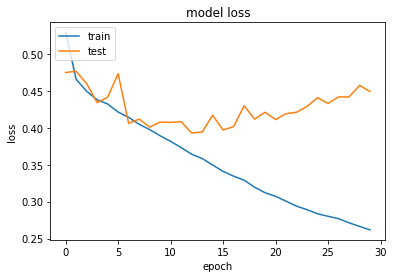

Ende des Versuchs: 
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 3, 8, 190)         6270      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_103 (Bat (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_103 (Dropout)        (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 2, 4, 190)         577790    
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_104 (Bat (Non

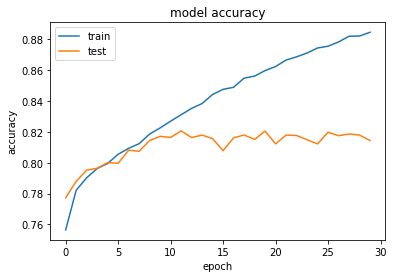

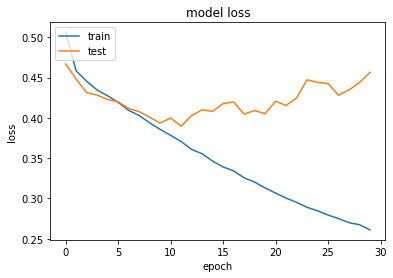

Ende des Versuchs: 
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 3, 8, 190)         6270      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_106 (Bat (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_106 (Dropout)        (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 2, 4, 190)         577790    
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_107 (Bat (Non

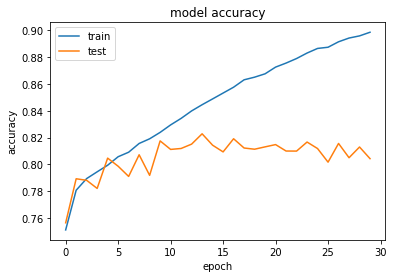

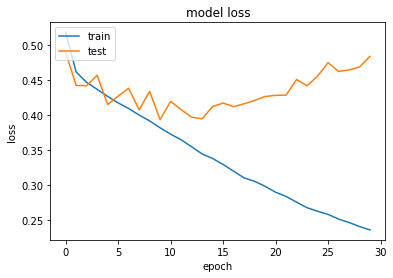

Ende des Versuchs: 
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 3, 8, 240)         7920      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_110 (Bat (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_110 (Dropout)        (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 2, 4, 240)         921840    
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_111 (Bat (Non

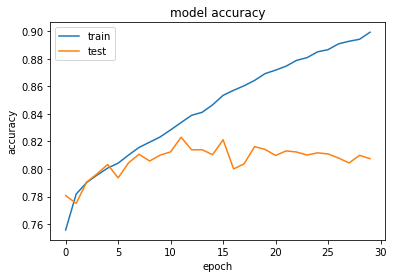

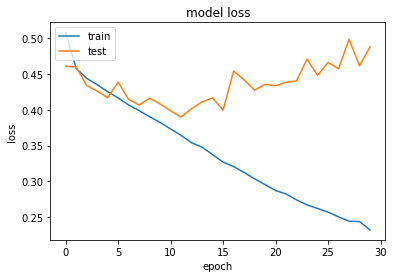

Ende des Versuchs: 
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 3, 8, 240)         7920      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_113 (Bat (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_113 (Dropout)        (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 2, 4, 240)         921840    
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_114 (Bat (Non

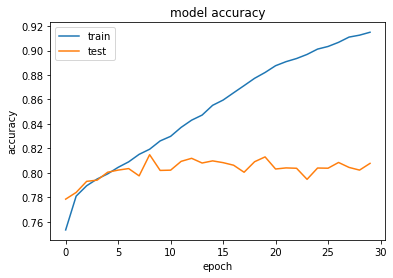

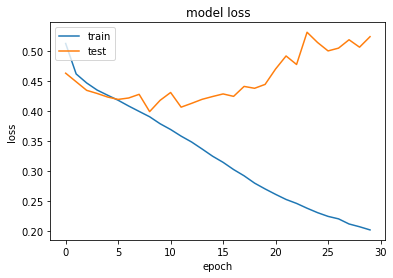

Ende des Versuchs: 
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 3, 8, 160)         5280      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_117 (Bat (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_117 (Dropout)        (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 2, 4, 160)         409760    
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_118 (Bat (Non

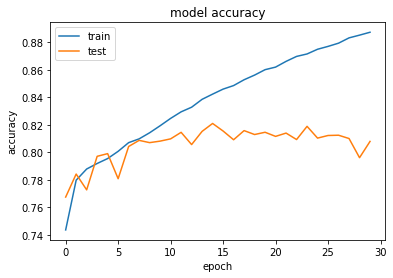

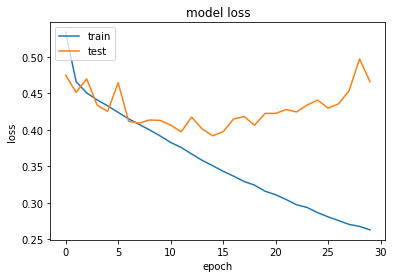

Ende des Versuchs: 
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 3, 8, 160)         5280      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 2, 4, 160)         0         
_________________________________________________________________
batch_normalization_121 (Bat (None, 2, 4, 160)         640       
_________________________________________________________________
dropout_121 (Dropout)        (None, 2, 4, 160)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 2, 4, 160)         409760    
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 1, 2, 160)         0         
_________________________________________________________________
batch_normalization_122 (Bat (Non

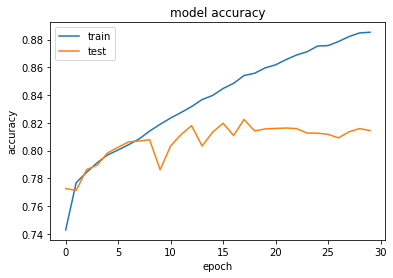

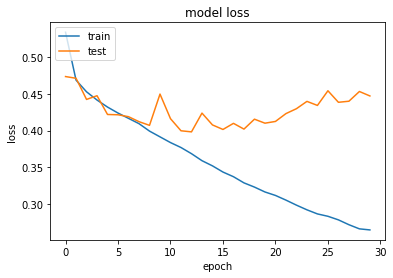

Ende des Versuchs: 
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 3, 8, 190)         6270      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_126 (Bat (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_126 (Dropout)        (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 2, 4, 190)         577790    
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_127 (Bat (Non

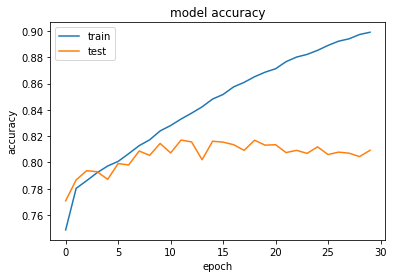

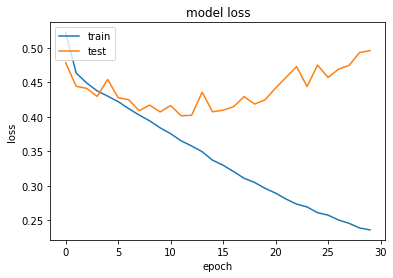

Ende des Versuchs: 
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 3, 8, 190)         6270      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_130 (Bat (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_130 (Dropout)        (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 2, 4, 190)         577790    
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_131 (Bat (Non

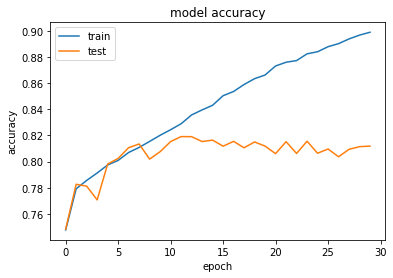

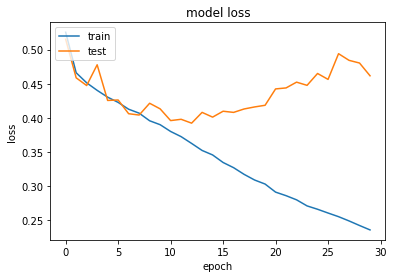

Ende des Versuchs: 
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 3, 8, 240)         7920      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_135 (Bat (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_135 (Dropout)        (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 2, 4, 240)         921840    
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_136 (Bat (Non

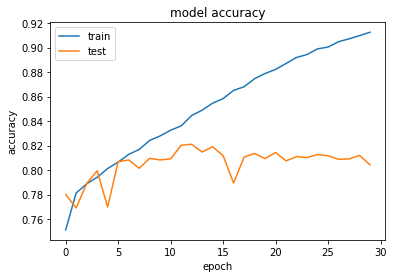

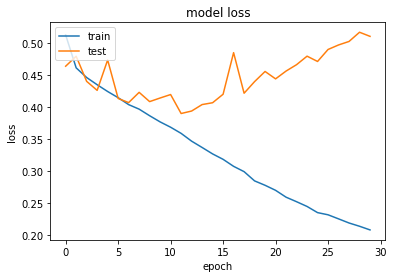

Ende des Versuchs: 
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 3, 8, 240)         7920      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 2, 4, 240)         0         
_________________________________________________________________
batch_normalization_139 (Bat (None, 2, 4, 240)         960       
_________________________________________________________________
dropout_139 (Dropout)        (None, 2, 4, 240)         0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 2, 4, 240)         921840    
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 1, 2, 240)         0         
_________________________________________________________________
batch_normalization_140 (Bat (Non

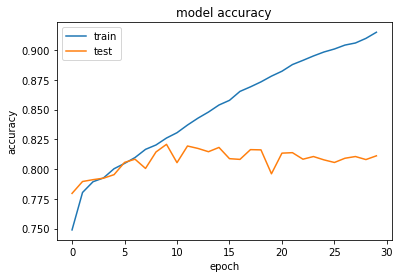

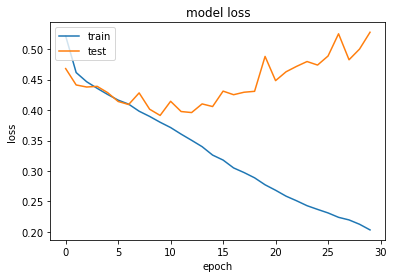

Ende des Versuchs: 


In [6]:
dense_layers = [1,2]
layer_sizes = [160,190,240]
conv_layers = [2,3]
kernal_size = [(2,2),(3,3),(4,4)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\LAPPD1x1CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="LAPPD(1x1)_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            #checkpoint,
                            tensorboard 
                ],
              epochs= 30)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

# Best Architetcrue

W0626 18:44:54.511703 55360 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0626 18:44:54.870988 55360 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 8, 150)         1350      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 8, 150)         90150     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 4, 150)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 4, 150)         600       
_________________________________________________________________
dropout (Dropout)            (None, 2, 4, 150)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 4, 150)         90150     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 2, 150)         0

Epoch 20/80
84100/85000 [============================>.] - ETA: 0s - loss: 0.3297 - acc: 0.8560
Epoch 00020: val_acc did not improve from 0.84365
85000/85000 [==============================] - 6s 67us/sample - loss: 0.3295 - acc: 0.8561 - val_loss: 0.4432 - val_acc: 0.8076
Epoch 21/80
84200/85000 [============================>.] - ETA: 0s - loss: 0.3264 - acc: 0.8566
Epoch 00021: val_acc did not improve from 0.84365
85000/85000 [==============================] - 6s 67us/sample - loss: 0.3264 - acc: 0.8566 - val_loss: 0.3694 - val_acc: 0.8352
Epoch 22/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.3253 - acc: 0.8574
Epoch 00022: val_acc did not improve from 0.84365
85000/85000 [==============================] - 6s 66us/sample - loss: 0.3252 - acc: 0.8574 - val_loss: 0.3523 - val_acc: 0.8436
Epoch 23/80
84000/85000 [============================>.] - ETA: 0s - loss: 0.3214 - acc: 0.8588
Epoch 00023: val_acc did not improve from 0.84365
85000/85000 [===================

84300/85000 [============================>.] - ETA: 0s - loss: 0.2684 - acc: 0.8843
Epoch 00049: val_acc did not improve from 0.84640
85000/85000 [==============================] - 6s 66us/sample - loss: 0.2686 - acc: 0.8842 - val_loss: 0.3691 - val_acc: 0.8415
Epoch 50/80
84600/85000 [============================>.] - ETA: 0s - loss: 0.2672 - acc: 0.8848
Epoch 00050: val_acc did not improve from 0.84640
85000/85000 [==============================] - 6s 66us/sample - loss: 0.2671 - acc: 0.8849 - val_loss: 0.3715 - val_acc: 0.8405
Epoch 51/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.2655 - acc: 0.8860
Epoch 00051: val_acc did not improve from 0.84640
85000/85000 [==============================] - 6s 66us/sample - loss: 0.2654 - acc: 0.8860 - val_loss: 0.3768 - val_acc: 0.8425
Epoch 52/80
84200/85000 [============================>.] - ETA: 0s - loss: 0.2633 - acc: 0.8872
Epoch 00052: val_acc did not improve from 0.84640
85000/85000 [==============================]

Epoch 79/80
84300/85000 [============================>.] - ETA: 0s - loss: 0.2334 - acc: 0.9010
Epoch 00079: val_acc did not improve from 0.84640
85000/85000 [==============================] - 6s 66us/sample - loss: 0.2332 - acc: 0.9011 - val_loss: 0.4207 - val_acc: 0.8387
Epoch 80/80
84000/85000 [============================>.] - ETA: 0s - loss: 0.2311 - acc: 0.9011
Epoch 00080: val_acc did not improve from 0.84640
85000/85000 [==============================] - 6s 66us/sample - loss: 0.2312 - acc: 0.9010 - val_loss: 0.4084 - val_acc: 0.8382
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


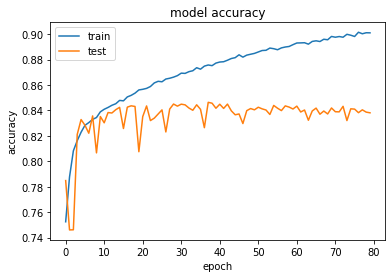

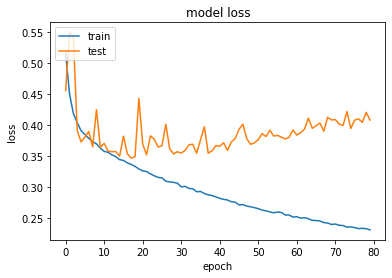

Ende des Versuchs: 


In [4]:
dense_layers = [1]
layer_sizes = [150]
conv_layers = [2]
kernal_size = [(2,2)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\LAPPD1x1CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu")) 
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="24PMTs_PID_120k-improvement_Timeflipped-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 80)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

In [5]:
model = tf.keras.models.load_model("24PMTs_PID_120k-improvement_Timeflipped-val-acc_0.85.model")

W0626 18:54:08.143947 55360 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0626 18:54:08.159482 55360 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0626 18:54:08.190719 55360 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [6]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.3579240579936394
Test accuracy:  0.8451183


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[6005 1505]
 [ 819 6676]]


[[0.79960053 0.20039947]
 [0.10927285 0.89072715]]


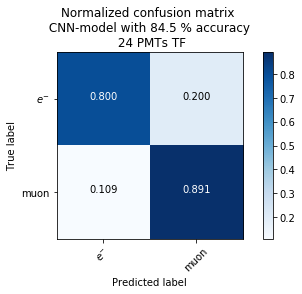

In [11]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84.5 % accuracy \n 24 PMTs TF')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

### Bestes Modell 24-PMT Perceptron

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 3, 8, 2)]         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 600)               29400     
_________________________________________________________________
batch_normalization_3 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_3 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 600)               360600    
_________________________________________________________________
batch_normalization_4 (Batch (None, 600)               2400  

84480/85000 [============================>.] - ETA: 0s - loss: 0.4213 - acc: 0.8051
Epoch 00018: val_acc did not improve from 0.79495
85000/85000 [==============================] - 7s 83us/sample - loss: 0.4214 - acc: 0.8050 - val_loss: 0.4394 - val_acc: 0.7918
Epoch 19/80
84992/85000 [============================>.] - ETA: 0s - loss: 0.4195 - acc: 0.8054
Epoch 00019: val_acc did not improve from 0.79495
85000/85000 [==============================] - 7s 81us/sample - loss: 0.4196 - acc: 0.8053 - val_loss: 0.4478 - val_acc: 0.7922
Epoch 20/80
84608/85000 [============================>.] - ETA: 0s - loss: 0.4133 - acc: 0.8114
Epoch 00020: val_acc improved from 0.79495 to 0.79625, saving model to Perceptron-24-PMT-PID-tf_val-acc_0.80.model
85000/85000 [==============================] - 7s 83us/sample - loss: 0.4133 - acc: 0.8114 - val_loss: 0.4337 - val_acc: 0.7962
Epoch 21/80
84224/85000 [============================>.] - ETA: 0s - loss: 0.4083 - acc: 0.8126
Epoch 00021: val_acc did not 

Epoch 47/80
84608/85000 [============================>.] - ETA: 0s - loss: 0.3487 - acc: 0.8438
Epoch 00047: val_acc did not improve from 0.80060
85000/85000 [==============================] - 6s 74us/sample - loss: 0.3490 - acc: 0.8437 - val_loss: 0.4460 - val_acc: 0.7980
Epoch 48/80
84480/85000 [============================>.] - ETA: 0s - loss: 0.3508 - acc: 0.8437
Epoch 00048: val_acc did not improve from 0.80060
85000/85000 [==============================] - 6s 74us/sample - loss: 0.3507 - acc: 0.8438 - val_loss: 0.4411 - val_acc: 0.7997
Epoch 49/80
84992/85000 [============================>.] - ETA: 0s - loss: 0.3472 - acc: 0.8449
Epoch 00049: val_acc did not improve from 0.80060
85000/85000 [==============================] - 6s 74us/sample - loss: 0.3472 - acc: 0.8449 - val_loss: 0.4500 - val_acc: 0.7983
Epoch 50/80
84736/85000 [============================>.] - ETA: 0s - loss: 0.3466 - acc: 0.8446
Epoch 00050: val_acc did not improve from 0.80060
85000/85000 [===================

Epoch 77/80
84736/85000 [============================>.] - ETA: 0s - loss: 0.3203 - acc: 0.8577
Epoch 00077: val_acc did not improve from 0.80060
85000/85000 [==============================] - 7s 81us/sample - loss: 0.3203 - acc: 0.8576 - val_loss: 0.4581 - val_acc: 0.7987
Epoch 78/80
84224/85000 [============================>.] - ETA: 0s - loss: 0.3188 - acc: 0.8598
Epoch 00078: val_acc improved from 0.80060 to 0.80065, saving model to Perceptron-24-PMT-PID-tf_val-acc_0.80.model
85000/85000 [==============================] - 7s 80us/sample - loss: 0.3189 - acc: 0.8598 - val_loss: 0.4607 - val_acc: 0.8007
Epoch 79/80
84864/85000 [============================>.] - ETA: 0s - loss: 0.3176 - acc: 0.8603
Epoch 00079: val_acc did not improve from 0.80065
85000/85000 [==============================] - 7s 78us/sample - loss: 0.3177 - acc: 0.8603 - val_loss: 0.4513 - val_acc: 0.7986
Epoch 80/80
84736/85000 [============================>.] - ETA: 0s - loss: 0.3159 - acc: 0.8607
Epoch 00080: val_

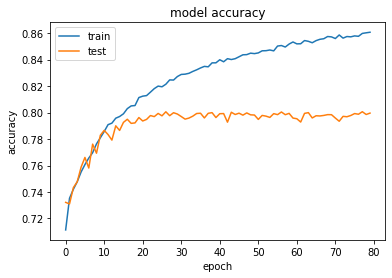

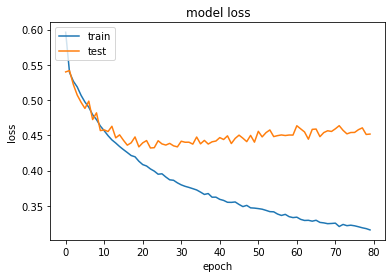

Ende des Versuchs: 


In [12]:
Tiefe = [5]
Batchgrose = [128]
Breite = [600]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\PMTsmallPerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            
            
            filepath="Perceptron-24-PMT-PID-tf_val-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 80)
            print(history.history.keys())
# summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

            print("Ende des Versuchs: ")


In [13]:
model = tf.keras.models.load_model("Perceptron-24-PMT-PID-tf_val-acc_0.80.model")

In [14]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.45623381316304323
Test accuracy:  0.7996001


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5548 1962]
 [1045 6450]]


[[0.73874834 0.26125166]
 [0.13942628 0.86057372]]


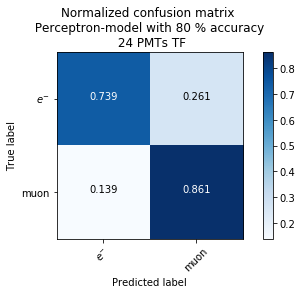

In [17]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Perceptron-model with 80 % accuracy \n 24 PMTs TF')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Tensorboard

cd "Documents\Python\CNN_Masterarbeit"

tensorboard --logdir=logs/ --host localhost --port 8088

tensorboard --logdir=logs/Overfitting_Studie --host localhost --port 8088

tensorboard --logdir=logs/Modell_Studie --host localhost --port 8088

tensorboard --logdir=logs/MuonElectron --host localhost --port 8088

tensorboard --logdir=BeamlikePI/logs/Time --host localhost --port 8088

# Evaluate

In [67]:
XTest.shape

(15005, 10, 16, 2)

In [82]:
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Test_LAPPD(1x1)_120k.pickle","wb")
pickle.dump(XTest,pickle_out,protocol=4)
pickle_out.close()
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Test_LAPPD(1x1)_120k.pickle","wb")
pickle.dump(YTest,pickle_out,protocol=4)
pickle_out.close()

In [30]:
model = tf.keras.models.load_model("PMT_24_PID_120k-improvement-val-acc_0.84.model")

W0521 13:34:22.750493  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 13:34:22.766009  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 13:34:22.781656  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [77]:
#LAPPD
model = tf.keras.models.load_model("LAPPD(1x1)_PID_120k-improvement-val-acc_0.83.model")

#Combined
#model = tf.keras.models.load_model("PMTOnly_Combined_PI_120k-60epoch_-improvement-val-acc_0.93.model")
#model = tf.keras.models.load_model("PMTOnly_Combined_PI_22k-80epoch-improvement-val-acc_0.92.model")
#Time
#model = tf.keras.models.load_model("PMT_Time_Only_batchnormed_PI_22k-improvement-val-acc_0.81.model")
#Charge
#model = tf.keras.models.load_model("PMT_Charge_Only_batchnormed_PI_22k-improvement-val-acc_0.93.model")

In [6]:
len(X)

120005

In [8]:
XTestC = X[:,:,:,0].reshape(120005,10,16,1)

In [12]:

print(XTestC.shape,Y.shape)
for sample in Y[:20]:
    print(sample)

(120005, 10, 16, 1) (120005, 2)
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]


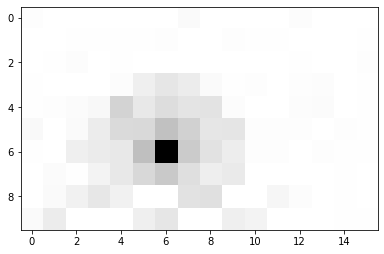

In [75]:
plt.imshow(XTest[7,:,:,0], cmap='binary', interpolation='None')

## Combined

In [78]:
### LAPPD
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.36467623370204594
Test accuracy:  0.8353882


In [56]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.35680383114329917
Test accuracy:  0.90992105


## Charge

In [13]:
score = model.evaluate(XTestC, Y, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.23812034977390828
Test accuracy:  0.90469563


In [85]:
score = model.evaluate(XTestC, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.19774321766031458
Test accuracy:  0.92719644


## Time

In [33]:
score = model.evaluate(XTestT, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.4832646434304745
Test accuracy:  0.8005923


# Confusion matrix


In [79]:

#prediction = model.predict(XTestC)
#print(prediction.shape,YTest.shape)
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5818 1629]
 [ 841 6717]]


In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## LAPPD

[[0.7812542  0.2187458 ]
 [0.11127282 0.88872718]]


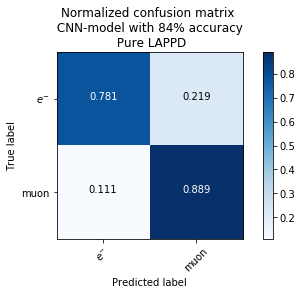

In [80]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n Pure LAPPD')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

## ALL PMTS

[[0.90041109 0.09958891]
 [0.03416399 0.96583601]]


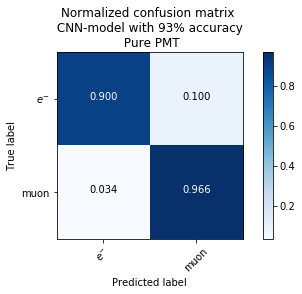

In [58]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 93% accuracy \n Pure PMT')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# 24 PMTs

In [62]:
cm2=[[0.79498861,0.20501139],
 [0.11230443,0.88769557]]

[[0.79498861 0.20501139]
 [0.11230443 0.88769557]]


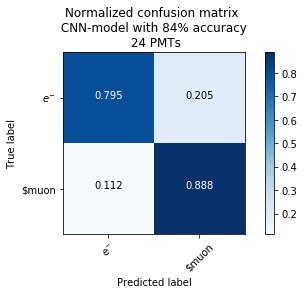

In [81]:
# Reshape into 2 x 2 matrix
#cm = cm.reshape((2,2))
cm2=np.array(cm2)
class_names = [r"$e^{-}$", "$muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm2, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n 24 PMTs')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [45]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


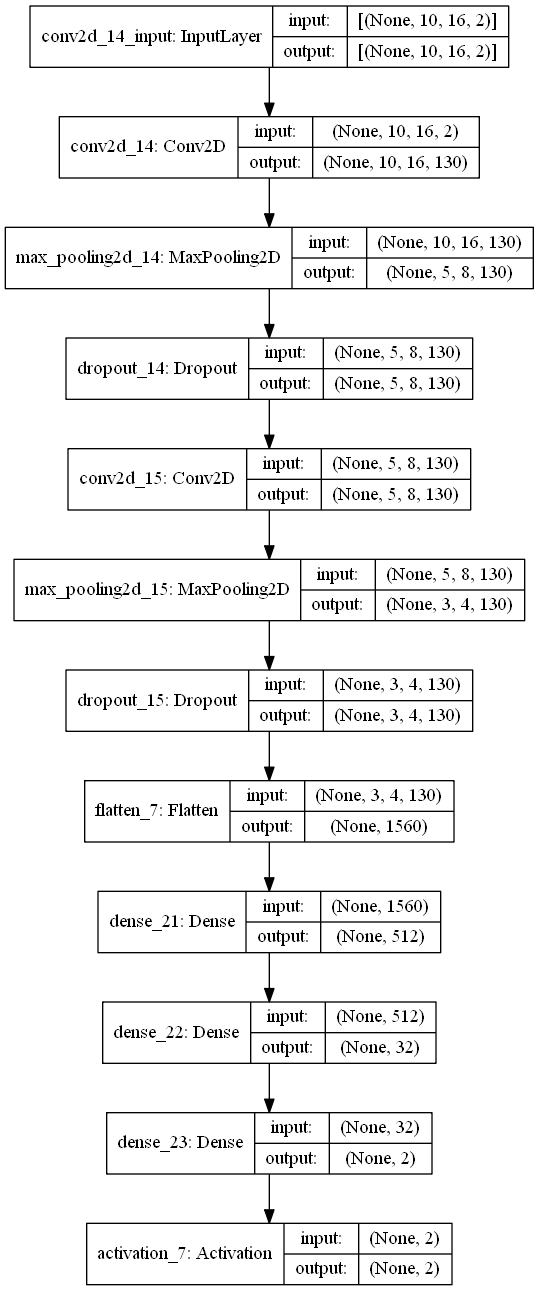

In [46]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [53]:
from matplotlib import pyplot

conv2d_12 (5, 5, 2, 130)


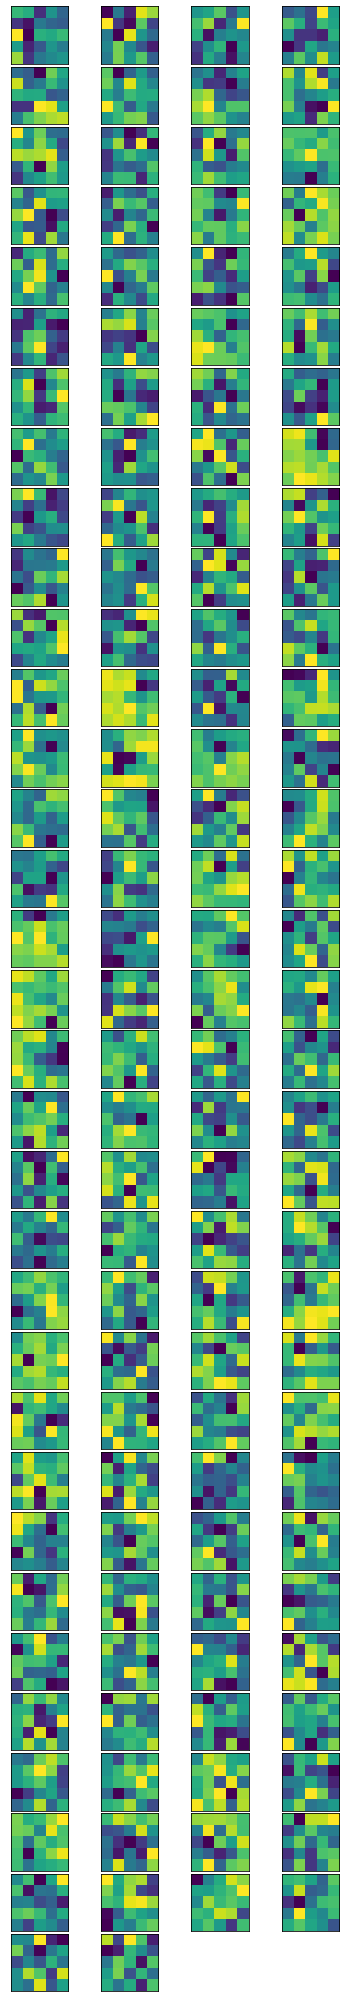

In [56]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [120]:
for j in range(1):
    print(j)

0


In [55]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [57]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (?, 10, 16, 130)
3 conv2d_13 (?, 5, 8, 130)


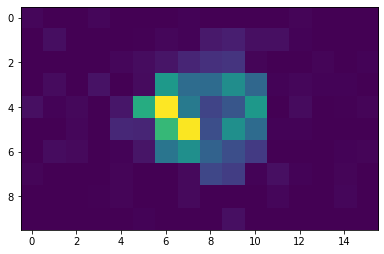

In [58]:
plt.imshow(X[9,:,:,0], cmap='viridis', interpolation='None')

In [86]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14_input (InputLayer) [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 16, 130)       6630      
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 130)


ValueError: num must be 1 <= num <= 52, not 53

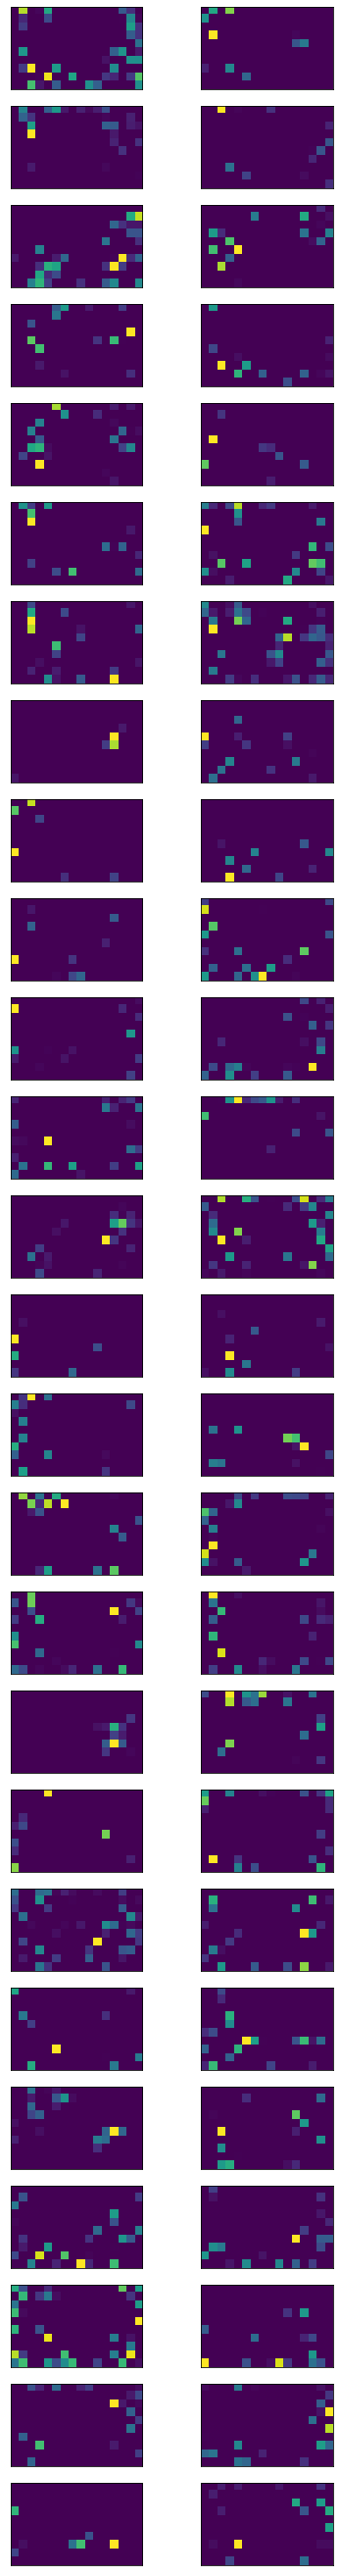

In [89]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[0].output)

model.summary()





# get feature map for first hidden layer
feature_maps = model.predict(XTest[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 2, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
#pyplot.savefig("PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()
